<a href="https://colab.research.google.com/github/shishiradk/pytorch-pratices/blob/main/02_Neural_Network_Classification_with_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Neural Network Classification with Pytorch

## 1. Make classification Data and get it ready

In [345]:
import sklearn

In [346]:
from sklearn.datasets import make_circles

#make 1000 samples
n_samples = 1000

# create circles
X,y = make_circles(n_samples,
                   noise = 0.03,
                   random_state =42)

In [347]:
len(X),len(y)

(1000, 1000)

In [348]:
print(f"First 5 samples of X:\n {X[:5]}")
print(f"First 5 ssamples of y:\n {y[:5]}")

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 ssamples of y:
 [1 1 1 1 0]


In [349]:
# Make DataFrame of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})
circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


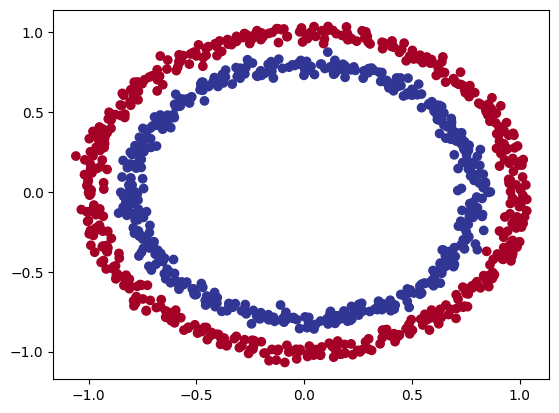

In [350]:
# Visualize
import matplotlib.pyplot as plt
plt.scatter(x =X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note: The data we're working with is often referred to as a toy dataset that is small enough to experiment but still sizable enough to pratice the fundamentals

###1.1 Check input and output shapes

In [351]:
X.shape,y.shape

((1000, 2), (1000,))

In [352]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [353]:
# view the first example of feauture and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for one sample of X: {X_sample} and the same for y:")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for one sample of X: [0.75424625 0.23148074] and the same for y:
Shapes for one sample of X: (2,) and the same for y: ()


# 1.2 Turn data into tensor and create train and test splits

In [354]:
import torch
torch.__version__

'2.8.0+cu126'

In [355]:
type(X), X.dtype

(numpy.ndarray, dtype('float64'))

In [356]:
# Turn data into tensor
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5],  y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [357]:
# Split data into training and test data
from sklearn.model_selection import train_test_split

X_train, X_test , y_train, y_test = train_test_split(X,
                                                     y,
                                                     test_size= 0.2,  # 0.2 = 20% of data will be test & 80% will be train
                                                     random_state=42)

In [358]:
len(X_train) , len(X_test),len(y_train), len(y_test)

(800, 200, 800, 200)

In [359]:
n_samples

1000

##2. Building a model

Lets build a model to classify our blue and red dots.

To do we want to:
1. Setup device agnostic code so code will run on an accelator(GPU) if there is one
2. Construct a model (by subclassing `nn.Module`)
3. Define a loss function and optimizer
4. Create a traing and test loop



In [360]:
# Import Pytorch and nn
import torch
from torch import nn


# Make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [361]:
X_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

Now we've setup device agnostic code, lets create a model that:

1. Subclasses `nn.module` (almost all models in Pytorch subclass `nn.Module`)
2. Create 2 `nn.Linear()` layers that are capable of handling the shapes  of our data
3. Defnes a `forward()` method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target `device`

In [362]:
X_train.shape

torch.Size([800, 2])

In [363]:
y_train[:5]

tensor([1., 0., 0., 0., 1.])

In [364]:
#1. Construct a model that subclass nn.Module
class CircleModelV0(nn.Module):
  def __init__(self):
    super().__init__()
    #2. create 2 nn.Linear

    self.layer_1 = nn.Linear(in_features=2,out_features=5)# takes in 2 features (X), produces 5 features
    self.layer_2 = nn.Linear(in_features=5, out_features=1)# takes in 5 features, produces 1 feature (y)

  def forward(self, x):
    return self.layer_2(self.layer_1(x)) # x -> layer_1 -> layer_2 -> output

#4. Instantiate an instance of our model class and send it to the target ddevice
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [365]:
device

'cuda'

In [366]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [367]:
# Lets replicate the model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [368]:
#Make prediction
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]], device='cuda:0')),
             ('0.bias',
              tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370], device='cuda:0')),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]], device='cuda:0')),
             ('1.bias', tensor([-0.1213], device='cuda:0'))])

In [369]:
# Make predictions
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Length of predictions:{ len(untrained_preds)},shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(X_test)}, Shape: {X_test.shape}" )
print(f"\nFirst 10 predictions: \n{torch.round(untrained_preds[:10])}")
print(f"\nFirst 10 labels:\n{y_test[:10]}")

Length of predictions:200,shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.],
        [-0.],
        [0.],
        [-0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [-0.]], device='cuda:0')

First 10 labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [370]:
y_test[:10],X_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]),
 tensor([[-0.3752,  0.6827],
         [ 0.0154,  0.9600],
         [-0.7028, -0.3147],
         [-0.2853,  0.9664],
         [ 0.4024, -0.7438],
         [ 0.6323, -0.5711],
         [ 0.8561,  0.5499],
         [ 1.0034,  0.1903],
         [-0.7489, -0.2951],
         [ 0.0538,  0.9739]]))

### 2.1 Setup loss function and optimizer

But different problem types require different loss functions.

For example, for a regression problem (predicting a number) you might use mean absolute error (MAE) or mean squared error(MSE) loss.

for classification you might use binary cross entropy or classification cross entropy (cross entropy)

As a reminder a loss function is used to determine how wrong your model is.

And for optimizer, two of the most common are SGD and Adam, however Pytorch has many built-in options.

**For the loss functon we''re going to use `torch.nn.BCEWithLogitsLoss()`,for more on what binary cross entropy (BCE)

In [371]:
# setup the loss function
#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid  activation functin prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() #BCEWithLogitsLoss = sigmoid activation function

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

In [372]:
# Calculate accuracy - out of 100 example eg, what percentage does our model get ri\ght ?
def acuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

## 3. Train Model

To train our model, we're going to need to build a  training loop:

1. forward pass

2. Calculate the loss

3. Optimizer zero grad

4. Loss backward(backpropagation)

5. Optimiaer step(gradient desecent)

### 3.1 Going from raw logits -. prediction prob -> pred labels

Our model outputs are going to be raw **logits**

We can conver these **logts** into **prediction probabilities** by passing them to some kind of activation function(e.g. sigmoid for binary classification and sofmax for multiclass classification)

Ten we can convert our model's prediction probabilities to prediction labels by either rounding them or taking the `argmax()`

In [373]:
model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [374]:
# view the first 5 outputs  of the forward pass on the test data
model_0.eval()
with torch.no_grad():
  y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.0338],
        [-0.0309],
        [ 0.0894],
        [-0.0692],
        [ 0.2967]], device='cuda:0')

In [375]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [376]:
#Use the sigmoid activation function on our model logits  to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4916],
        [0.4923],
        [0.5223],
        [0.4827],
        [0.5736]], device='cuda:0')

For our pred prob values , we need to peform a range - style rounding on them:
* `y_pred_probs` >0.5, y=1 (class 1)
* `y_pred_probs` < ).5, y=0 (class 0)

In [377]:
# find the pred
y_preds = torch.round(y_pred_probs)

# in full (logits -> pred  probs -> pred labels)
y_pred_labels =- torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

# CHeck for equality
print(torch.eq(y_preds.squeeze(),y_pred_labels.squeeze()))

# Get rid of  extra dimension
y_preds.squeeze()

tensor([ True,  True, False,  True, False], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

In [378]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

### 4.3 Training and Test loop

In [379]:
device

'cuda'

In [380]:
!nvidia-smi

Tue Oct 21 07:55:58 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   76C    P0             33W /   70W |     158MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [381]:
import torch
from torch import nn

# Calculate accuracy - out of 100 example eg, what percentage does our model get ri\ght ?
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred)) * 100
    return acc

torch.manual_seed(42)

# Set the number of epochs
epochs = 100

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Build training and evaluation loop
for epoch in range(epochs):
    ### Training
    model_0.train()

    # 1. Forward pass (model outputs raw logits)
    y_logits = model_0(X_train).squeeze() # squeeze to remove extra `1` dimensions, this won't work unless model and data are on same device
    y_pred = torch.round(torch.sigmoid(y_logits)) # turn logits -> pred probs -> pred labls

    # 2. Calculate loss/accuracy
    # loss = loss_fn(torch.sigmoid(y_logits), # Using nn.BCELoss you need torch.sigmoid()
    #                y_train)
    loss = loss_fn(y_logits, # Using nn.BCEWithLogitsLoss works with raw logits
                   y_train)
    acc = acuracy_fn(y_true=y_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69796, Accuracy: 51.88% | Test loss: 0.69440, Test acc: 58.00%
Epoch: 10 | Loss: 0.69590, Accuracy: 51.25% | Test loss: 0.69305, Test acc: 53.00%
Epoch: 20 | Loss: 0.69490, Accuracy: 51.62% | Test loss: 0.69254, Test acc: 49.50%
Epoch: 30 | Loss: 0.69435, Accuracy: 51.12% | Test loss: 0.69236, Test acc: 49.50%
Epoch: 40 | Loss: 0.69401, Accuracy: 50.88% | Test loss: 0.69232, Test acc: 51.00%
Epoch: 50 | Loss: 0.69378, Accuracy: 50.25% | Test loss: 0.69234, Test acc: 50.00%
Epoch: 60 | Loss: 0.69362, Accuracy: 50.00% | Test loss: 0.69239, Test acc: 51.50%
Epoch: 70 | Loss: 0.69351, Accuracy: 50.25% | Test loss: 0.69246, Test acc: 51.00%
Epoch: 80 | Loss: 0.69342, Accuracy: 49.88% | Test loss: 0.69254, Test acc: 50.00%
Epoch: 90 | Loss: 0.69336, Accuracy: 49.88% | Test loss: 0.69262, Test acc: 53.00%


##4. make prediction and  evaluate the model

From the metrices it lookn like our model isn't learning anythng...

So to inspect it lets make some predictions and make them visual!

In other words "Visualize"

To do so , we're going to import a function `https://github.com/mrdbourke/pytorch-deep-learning/blob/main/helper_functions.py`

In [382]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


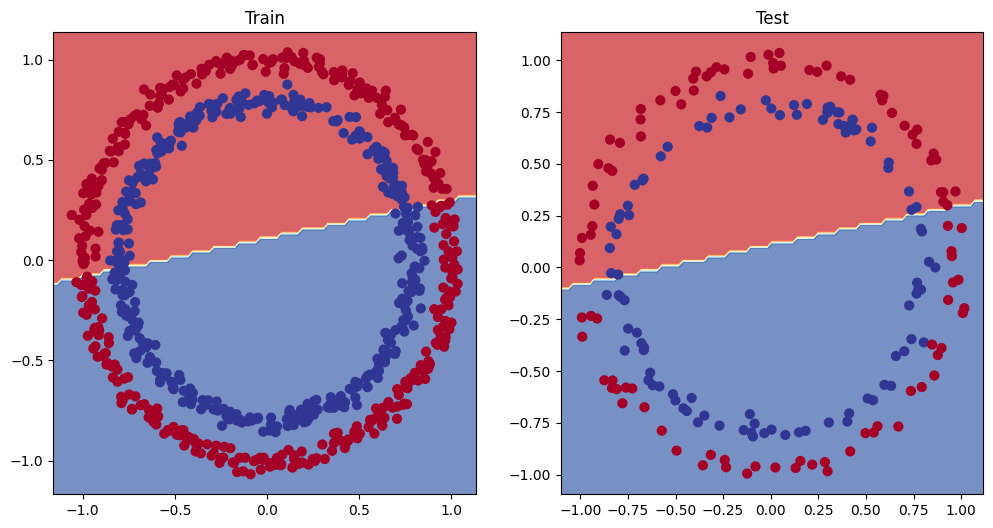

In [383]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

In [384]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10) # extra layer
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x): # note: always make sure forward is spelt correctly!
        # Creating a model like this is the same as below, though below
        # generally benefits from speedups where possible.
        # z = self.layer_1(x)
        # z = self.layer_2(z)
        # z = self.layer_3(z)
        # return z
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [385]:
# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)

In [386]:
#write a training and evaluaton loop for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Train for longer
epochs = 1000

# Put data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  ##Training
  model_1.train()
  #1.Forward pass
  y_logits =model_1(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))


  #2. Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #3. optimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward (backpropagation)
  loss.backward()

  #5. oPTIMIZER SDTEP (GRADIENT DESCENT)
  optimizer.step()

  ## Testimg
  model_1.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_1(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #2. Calculate loss
    test_loss = loss_fn(test_logits,

                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    #print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:5f}, Acc: {acc:2f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.693955, Acc: 50.875000 | Test loss: 0.69261, Test acc: 51.00%
Epoch: 100 | Loss: 0.693048, Acc: 50.375000 | Test loss: 0.69379, Test acc: 48.00%
Epoch: 200 | Loss: 0.692986, Acc: 51.125000 | Test loss: 0.69437, Test acc: 46.00%
Epoch: 300 | Loss: 0.692980, Acc: 51.625000 | Test loss: 0.69458, Test acc: 45.00%
Epoch: 400 | Loss: 0.692980, Acc: 51.125000 | Test loss: 0.69465, Test acc: 46.00%
Epoch: 500 | Loss: 0.692980, Acc: 51.000000 | Test loss: 0.69467, Test acc: 46.00%
Epoch: 600 | Loss: 0.692980, Acc: 51.000000 | Test loss: 0.69468, Test acc: 46.00%
Epoch: 700 | Loss: 0.692980, Acc: 51.000000 | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.692980, Acc: 51.000000 | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.692980, Acc: 51.000000 | Test loss: 0.69468, Test acc: 46.00%


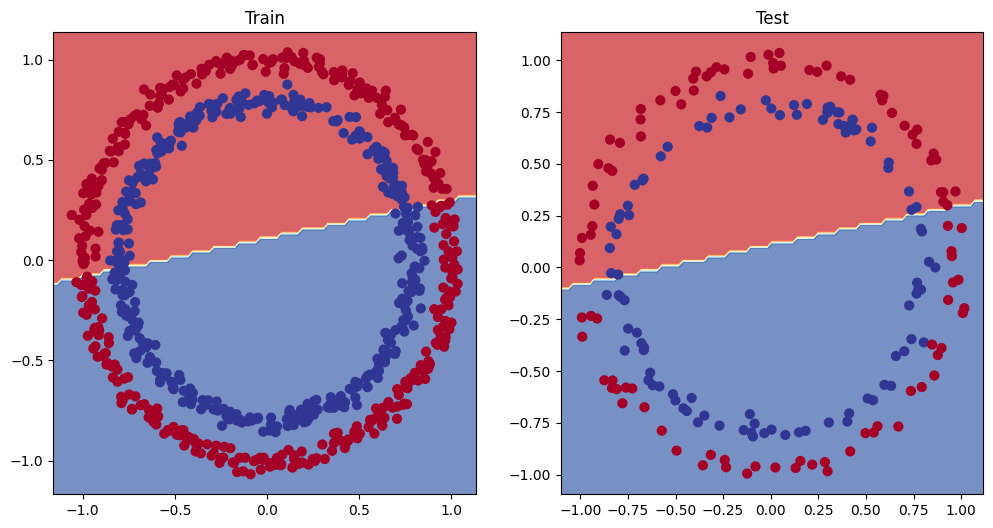

In [387]:
# Plot the decision boundary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

### 5.1 Preparing data to see if our model can fit a strainght line

One way to troubleshoot to a larger problem is to test out a smaller problem.

In [388]:
## Create some data (same as notebook 01)
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.01

#  create data
X_regression = torch.arange(start,end, step ).unsqueeze(dim=1)
y_regression = weight * X_regression +bias #linear regression formula (without epsilon)

#check the data
print(len(X_regression))
X_regression[:5], y_regression[:5]

100


(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [389]:
# Create train and test split
train_split = int(0.8 * len(X_regression))
X_train_regression, y_train_regression = X_regression[:train_split], y_regression[:train_split]
X_test_regression, y_test_regression = X_regression[train_split:], y_regression[train_split:]

#check the length of each
len(X_train_regression), len(X_test_regression), len(y_train_regression), len(y_test_regression)

(80, 20, 80, 20)

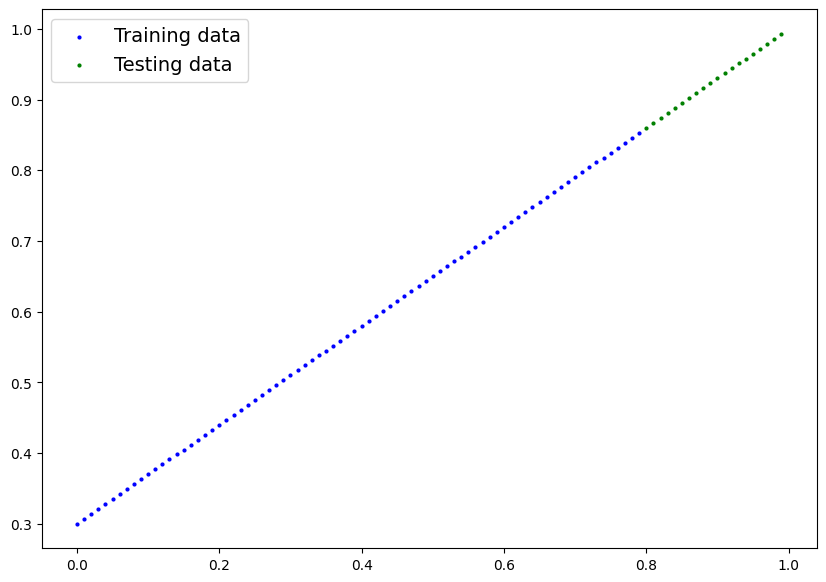

In [390]:
plot_predictions(train_data=X_train_regression,
                 train_labels=y_train_regression,
                 test_data=X_test_regression,
                 test_labels=y_test_regression);

### 5.2 Adjusting `model_1` to fit a straight line

In [391]:
# Same architecture as model_1 (BUT using nn.Sequential())
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [392]:
# Loss and optimizer]
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.001)

In [393]:
# Train the model
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#set the number of epochs
epochs = 1000

#put the data ont the target device
X_train_regression,y_train_regression =X_train_regression.to(device), y_train_regression.to(device)
X_test_regression, y_test_regression = X_test_regression.to(device), y_test_regression.to(device)

#Training
for epoch in range(epochs):
  y_pred = model_2(X_train_regression)
  loss = loss_fn(y_pred, y_train_regression)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  #Testing
  model_2.eval()
  with torch.inference_mode():
    test_pred =model_2(X_test_regression)
    test_loss = loss_fn(test_pred, y_test_regression)

  #Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.759859 | Test loss: 0.94965
Epoch: 100 | Loss: 0.402718 | Test loss: 0.54029
Epoch: 200 | Loss: 0.058761 | Test loss: 0.13480
Epoch: 300 | Loss: 0.014612 | Test loss: 0.03342
Epoch: 400 | Loss: 0.003083 | Test loss: 0.00008
Epoch: 500 | Loss: 0.003088 | Test loss: 0.00012
Epoch: 600 | Loss: 0.003093 | Test loss: 0.00018
Epoch: 700 | Loss: 0.002988 | Test loss: 0.00011
Epoch: 800 | Loss: 0.002994 | Test loss: 0.00016
Epoch: 900 | Loss: 0.002889 | Test loss: 0.00011


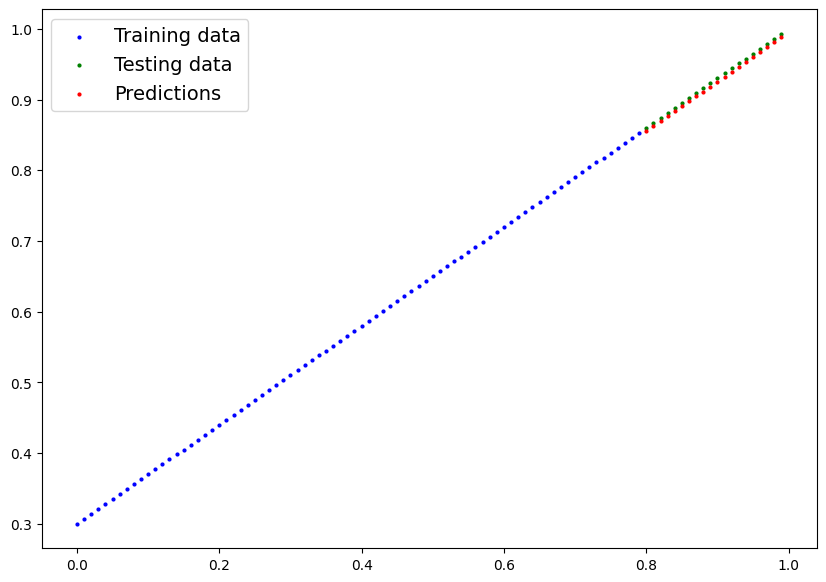

In [394]:
# Turn on evaluation mode
model_2.eval()

# Make prediction (inference)
with torch.inference_mode():
  y_preds = model_2(X_test_regression)

#Plot data and predictions
plot_predictions(train_data=X_train_regression.cpu(),
                 train_labels=y_train_regression.cpu(),
                 test_data=X_test_regression.cpu(),
                 test_labels=y_test_regression.cpu(),
                 predictions=y_preds.cpu());

## 6. The missing  piece: non - liunearity

"What patterns could you draw if you were given an ifinite amount of a straight and non -straight lines?"

Or in machine learning terms, an infinite (but really it is  finite) of linear and non-linear  funcions?

## 6.1 Recreatiing non-linear data(red and blue circles)

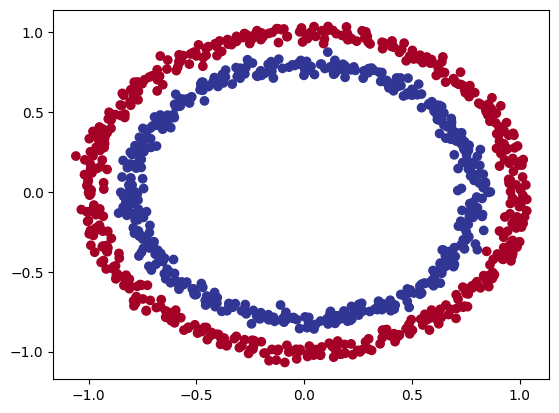

In [395]:
# Make and plot  data
import matplotlib.pyplot as plt
from sklearn.datasets  import make_circles

n_samples = 1000

X, y= make_circles(n_samples,
                   noise=0.03,
                   random_state=42)
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [396]:
# convert data to tensors and then to train and test splits
import torch
from sklearn.model_selection import train_test_split

#  Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

X_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

### 6.2 Building a model with non-linearity

* Linear =  straight linear
* Non-linear = non-sraight lines

Artificial neural networks are a large combination of linear (straight) and non-straight (non-linear) functions which  are potentially able to find  patterns in data.

In [397]:
#Build a model with non-linear activation function
from torch import nn
class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() #relu is non-linearactivation function

  def forward(self, x):
    #Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [398]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(), lr=0.1)

### 6.3 Training a model with non-linearity

In [399]:
 # Random seeds
 torch.manual_seed(42)
 torch.cuda.manual_seed(42)

 # Put all data on target device
 X_train, y_train = X_train.to(device), y_train.to(device)
 X_test, y_test = X_test.to(device), y_test.to(device)

 #Loop through data
 epochs = 2000

 for epoch in range(epochs):
  ###Training
  model_3.train()


  #1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  #2. Calculate loss/accuracy
  loss = loss_fn(y_logits,
                 y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  #Opptiimizer zero grad
  optimizer.zero_grad()

  #4. Loss backward
  loss.backward()

  #5. Step the optimizeer
  optimizer.step()

  ## Testimg
  model_3.eval()
  with torch.inference_mode():
    #1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    #2. Calculate loss
    test_loss = loss_fn(test_logits,

                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

    #print out what's happening
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | Loss: {loss:5f}, Acc: {acc:2f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.692946, Acc: 50.000000 | Test loss: 0.6932, Test acc: 50.00%
Epoch: 100 | Loss: 0.691153, Acc: 52.875000 | Test loss: 0.6910, Test acc: 52.50%
Epoch: 200 | Loss: 0.689774, Acc: 53.375000 | Test loss: 0.6894, Test acc: 55.00%
Epoch: 300 | Loss: 0.687949, Acc: 53.000000 | Test loss: 0.6872, Test acc: 56.00%
Epoch: 400 | Loss: 0.685168, Acc: 52.750000 | Test loss: 0.6841, Test acc: 56.50%
Epoch: 500 | Loss: 0.681022, Acc: 52.750000 | Test loss: 0.6794, Test acc: 56.50%
Epoch: 600 | Loss: 0.675149, Acc: 54.500000 | Test loss: 0.6729, Test acc: 56.00%
Epoch: 700 | Loss: 0.666589, Acc: 58.375000 | Test loss: 0.6632, Test acc: 59.00%
Epoch: 800 | Loss: 0.651596, Acc: 64.000000 | Test loss: 0.6476, Test acc: 67.50%
Epoch: 900 | Loss: 0.623623, Acc: 74.000000 | Test loss: 0.6215, Test acc: 79.00%
Epoch: 1000 | Loss: 0.568184, Acc: 87.750000 | Test loss: 0.5738, Test acc: 86.50%
Epoch: 1100 | Loss: 0.481530, Acc: 93.500000 | Test loss: 0.4993, Test acc: 90.50%
Epoch: 1200 | Lo

### 6.4 Evaluating aa model trained with  non-linear activation functions

In [400]:
#make redictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

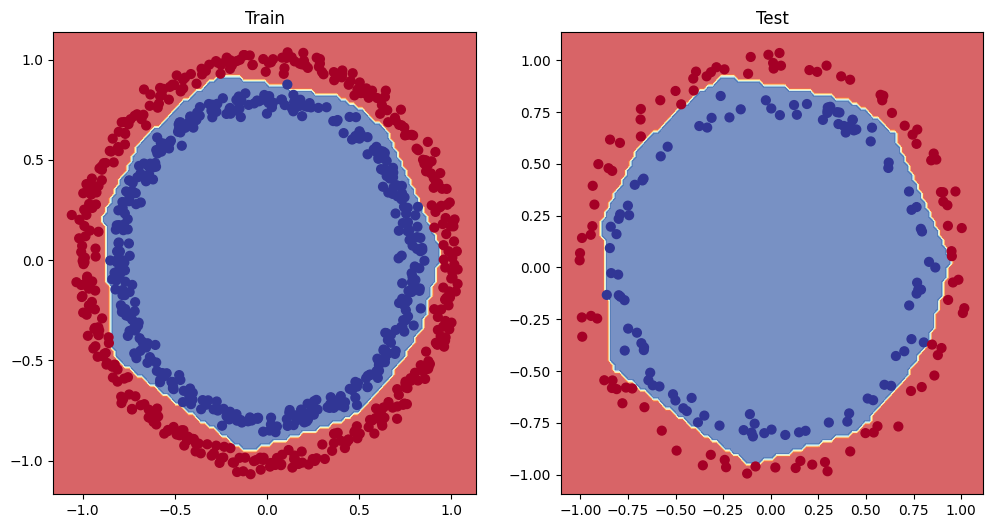

In [401]:
#Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)

### 7. Replicating non-linear activation functions

Neural networks,  rarther than us telling the model what to learn, we give it the tools to discover patterns in data and patterns on its own.

And these tools are linear & non-linear functions.

In [402]:
 #Create a tensor
A = torch.arange (-10,10,1,dtype=torch.float32)
A.dtype

torch.float32

In [403]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

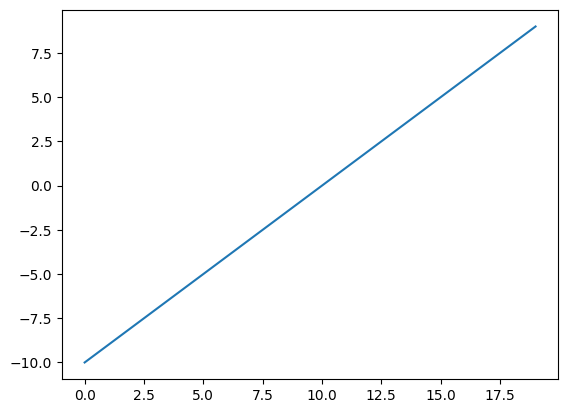

In [405]:
#Viosualize the tensor
plt.plot(A)

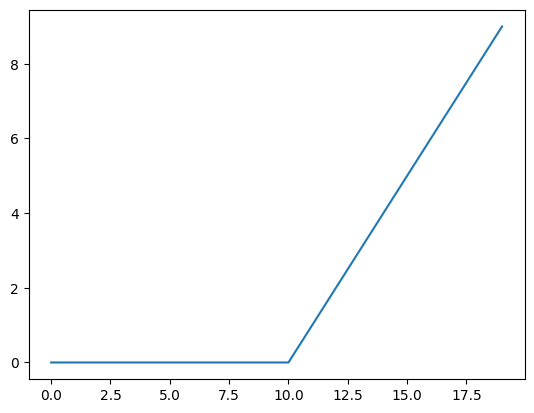

In [406]:
plt.plot(torch.relu(A))

In [408]:
def relu(x):
  return torch.maximum(torch.tensor(0), x) #inputs must be tensors

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

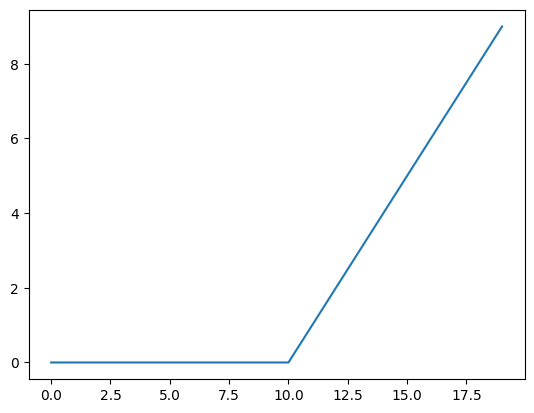

In [409]:
# Plot Rel activation function
plt.plot(relu(A))

In [410]:
#Now lets do th3e same for sgmoid
def sigmoid(x):
  return 1/ (1 + torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

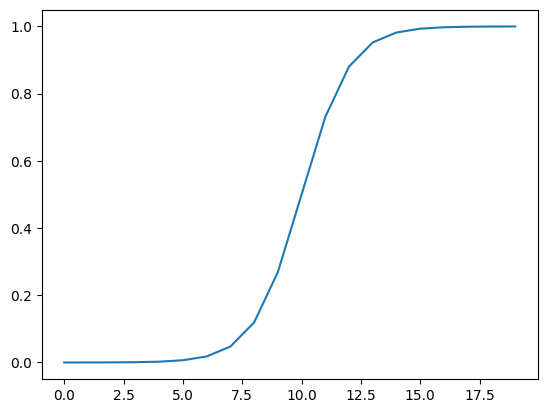

In [411]:
plt.plot(sigmoid(A))